In [6]:
from PIL import Image, ImageDraw
from numpy import *
from pylab import *
import cv2
from IPython.display import display
import time
import random
import ipywidgets as widgets

In [7]:
out = widgets.Output(layout={'border': '1px solid black'})

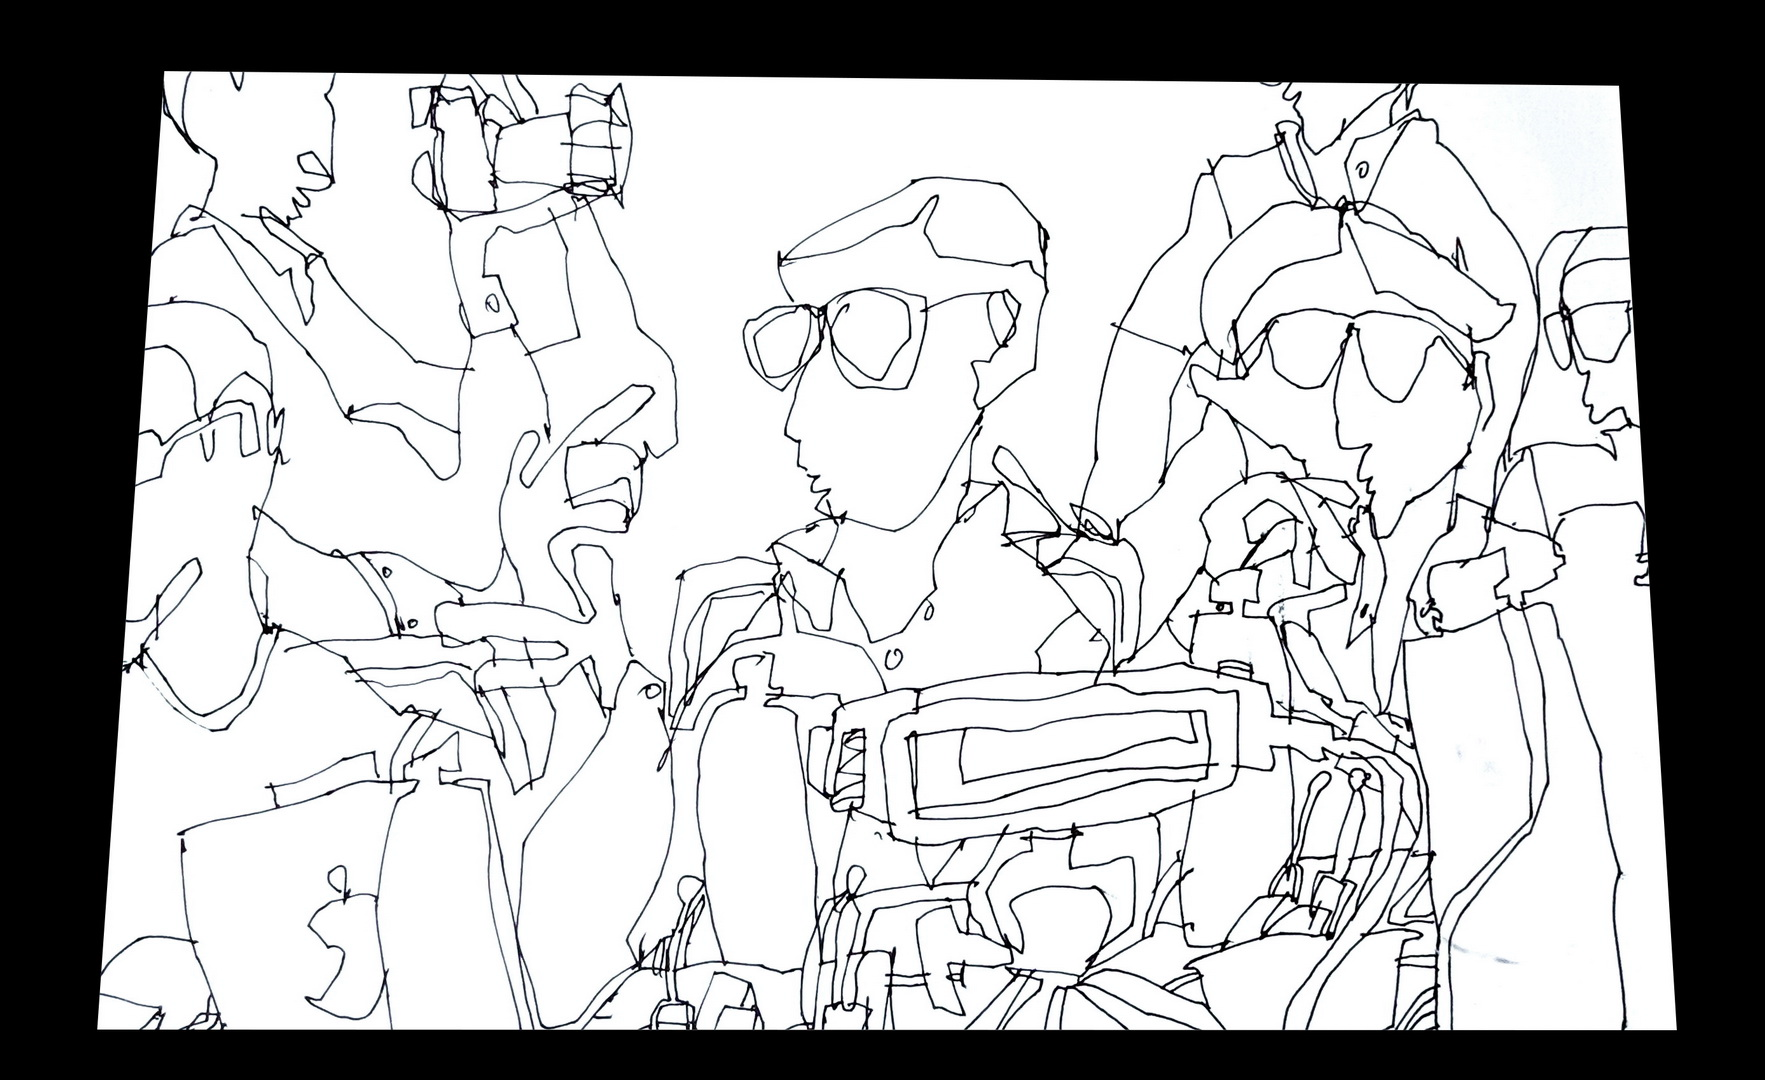

In [14]:
# read image
#filename = r'C:\Users\RYAN\Dropbox (MIT)\01_Work\MAS\18_Fall 2019\191020_flood_fill_test\pic2.jpg'
filename = 'pic4_3_1080p.jpg'
im = cv2.imread(filename)
imbk = cv2.imread(filename)
#print(im)
h,w = im.shape[:2]
pil_im = Image.fromarray(im)
display(pil_im)

# random color function
def RandomComponent():
    return random.randint(0,255)
def RandomColor():
    return (RandomComponent(),RandomComponent(),RandomComponent())

In [15]:
colorTolerance = 5  #5
s = 10  #space  #10  #100
# picture size: 1765x1080
nx = 176  #176  #17+1
ny = 108  #108  #10+1
textSize = 0.05  #0.05  #0.3

black = (0,0,0)
dBlack = 400

redRGB = (255,0,0)
greenRGB = (0,255,0)
blueRGB = (0,0,255)
redBGR = (0,0,255)
greenBGR = (0,255,0)
blueBGR = (255,0,0)

# flood fill example
diff = (colorTolerance,colorTolerance,colorTolerance)
mask = zeros((h+2,w+2), uint8)
maskbk = zeros((h+2,w+2), uint8)
#cv2.floodFill(im,mask,(10,10),(0,0,255),diff,diff)

# loop fill grid
msec1 = int(round(time.time() * 1000))
for j in range(ny):
    for i in range(nx):
        #out.clear_output()
        # mark testing pixel to red
        #print(f'imbk[s*j][s*i] = {imbk[s*j][s*i]}')
        #print(f'black = {black}')
        dColor = linalg.norm(imbk[s*j][s*i]-black)
        if dColor > dBlack:
            #print(f's*i = {s*i}; s*j = {s*j}')
            #print(f'dColor = {dColor}')
            # reset mask; will be very slow 16+ sec
            #mask = maskbk.copy()
            cv2.floodFill(im,mask,(s*i,s*j),RandomColor(),diff,diff,4 | ( 255 << 8 ))
            # display each step
            #pil_im = Image.fromarray(im)
            #display(pil_im)
            #time.sleep(3)
msec2 = int(round(time.time() * 1000))
print(f'{msec2-msec1} milliseconds passed for all flood fill operations')

# put texts
for j in range(ny):
    for i in range(nx):
        dColor = linalg.norm(imbk[s*j][s*i]-black)
        if dColor > dBlack:
            # paint the pixel blue
            #im[s*j][s*i] = blue
            # put blue text
            cv2.putText(im, f'{s*i},{s*j}', (s*i,s*j), cv2.FONT_HERSHEY_SIMPLEX, textSize, blueRGB)
        else:
            # put red text
            cv2.putText(im, f'{s*i},{s*j}', (s*i,s*j), cv2.FONT_HERSHEY_SIMPLEX, textSize, redRGB)

506 milliseconds passed for all flood fill operations


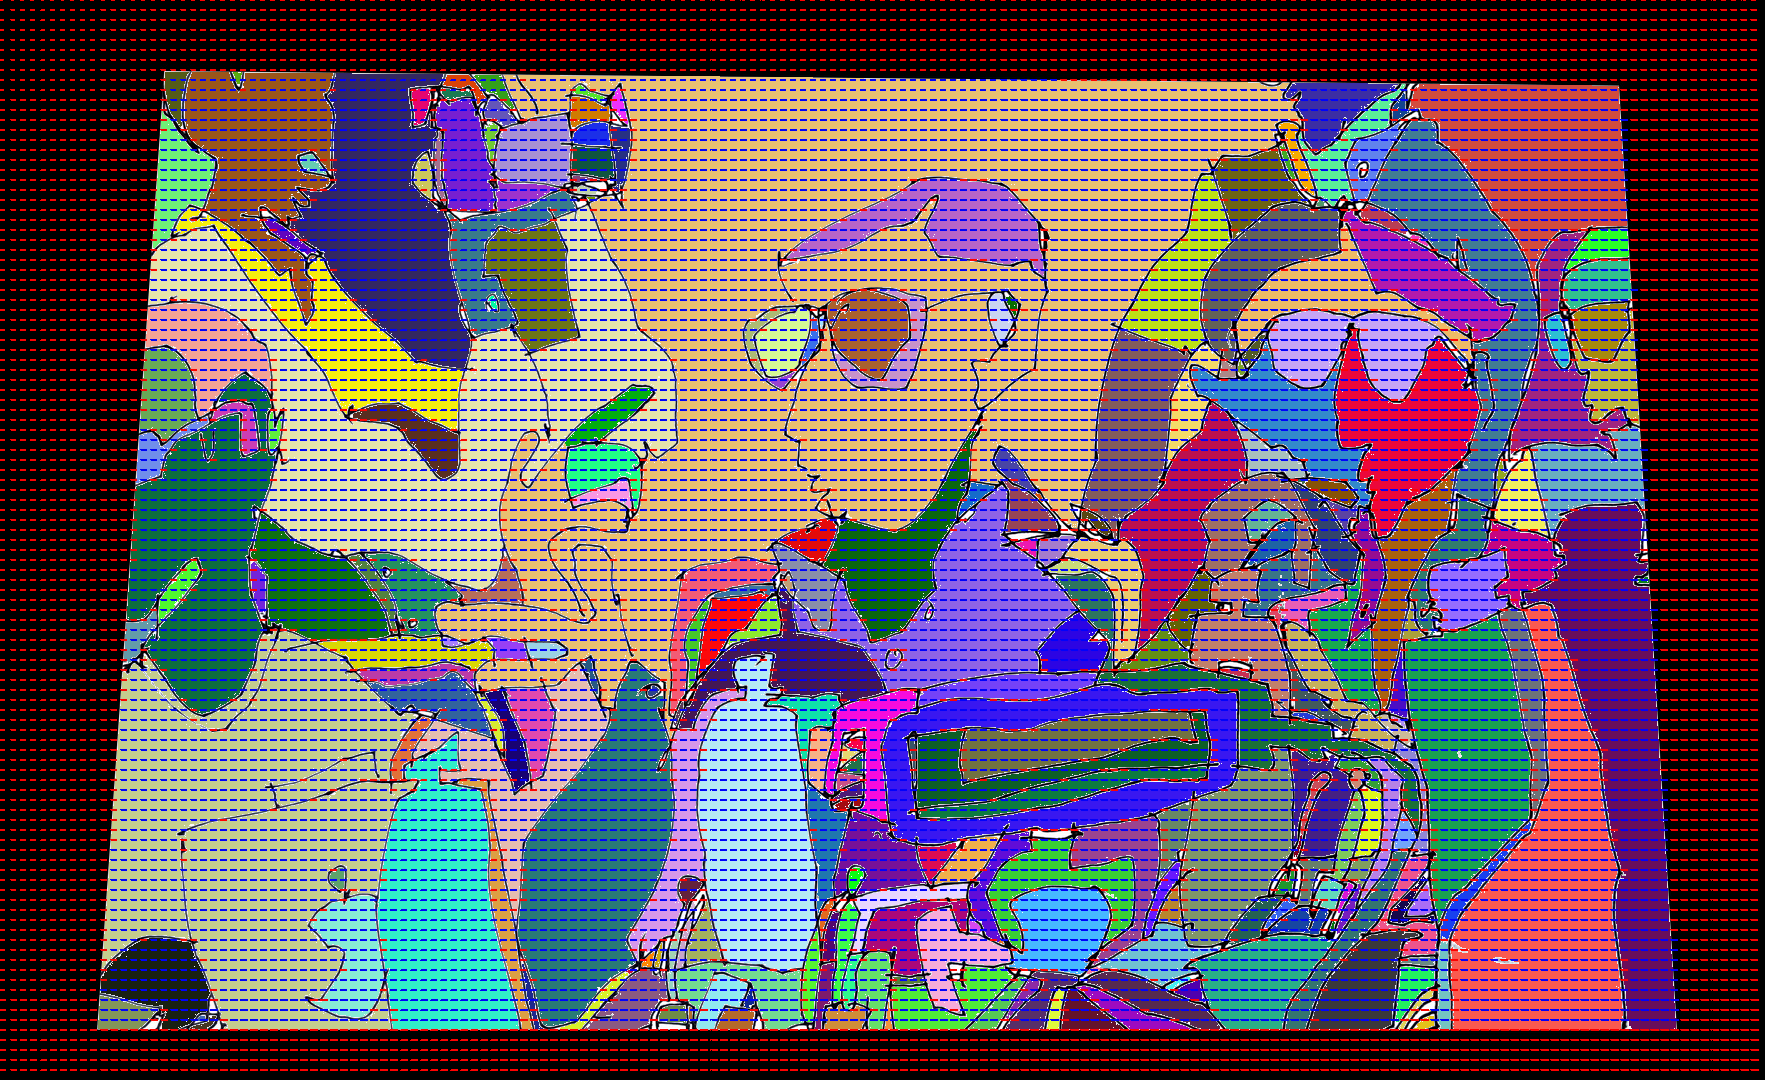

In [16]:
# show the result in a OpenCV window
#cv2.imshow('Flood Fill Image', im)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# save the result
#cv2.imwrite('pic4_result.jpg', im)

# display the saved ima
pil_im = Image.fromarray(im)
display(pil_im)

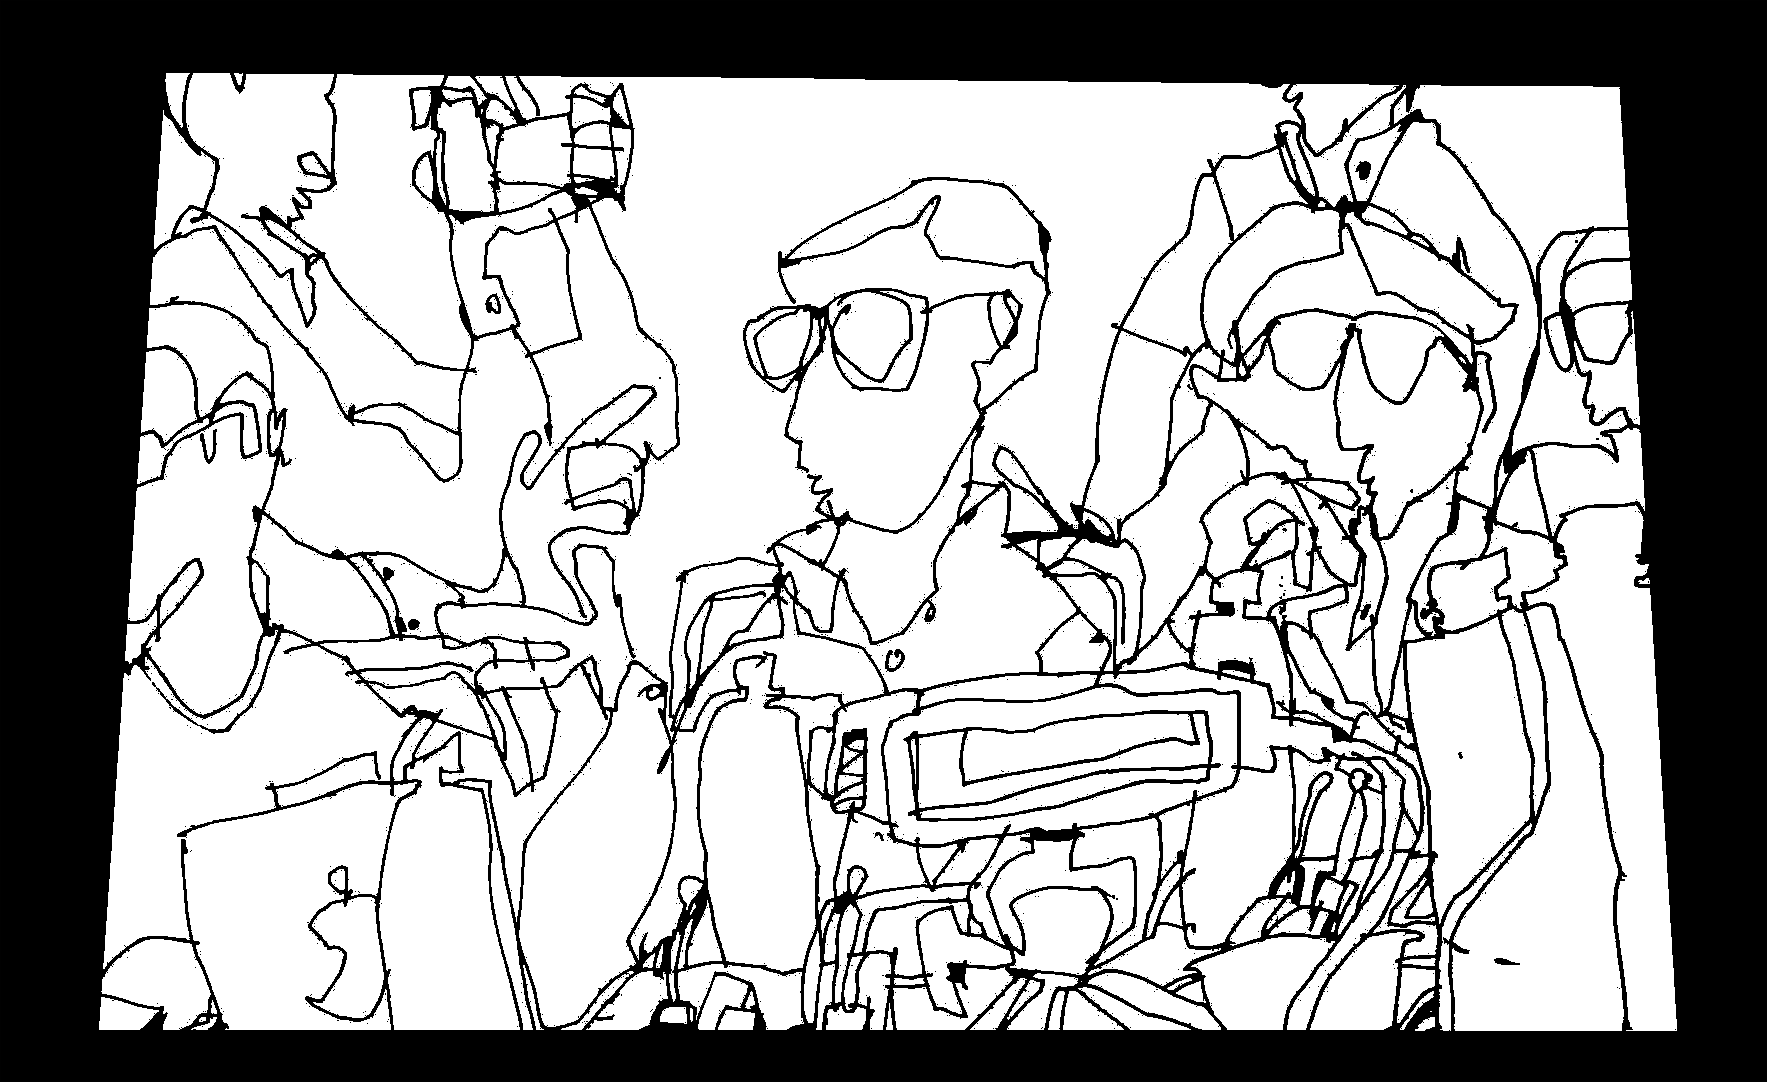

In [11]:
# display the mask
pil_msk = Image.fromarray(mask)
display(pil_msk)